# **Video Recommender**  

**By:** Pedro Ruiz  

---  

En este notebook, desarrollaremos el **sistema de recomendación** para identificar **similitud entre los videos**, basándonos en las características generadas en el notebook `05_vectorization.ipynb`.  

Cada vídeo está representado por un **vector de características**, donde las **columnas corresponden a objetos/clases detectados** y los **valores indican su importancia**. La **similitud entre vídeos** la calcularemos utilizando la **distancia coseno**, con la que evaluaremos el **grado de similitud entre vectores**.
  
Consta de:

1. **Importaciones**
2. **Configuracion**
3. **Exploración de datos**
4. **Sistema de recomendación**
5. **Función de recomendación**
6. **Ejemplo de uso**
7. **Visualización**

## 1. Importaciones  


In [1]:
import os
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances

## 2. Configuración

In [2]:
config = configparser.ConfigParser()
config.read('../config/settings.conf')

features_path = "../data/video_features.csv"
df = pd.read_csv(features_path)                             # Cargamos el archivo de features

## 3. Exploración de datos  

Antes de proceder, **verificaremos las categorías disponibles**.

In [3]:
categories = df['category'].unique()
print("Categorías detectadas:", categories)

Categorías detectadas: ['cooking' 'traffic' 'videoclip']


## 4. Sistema de recomendación  

### Preparación de datos  

- **Extraeremos** la **matriz de características**, eliminando las columnas que no son numéricas (`category` y `video_name`).  
- Guardaremos los **nombres** y **categorías** de los vídeos, lo que nos **servirá** para posteriormente **mostrar los resultados**.

In [5]:
X = df.drop(columns=['category','video_name']).values

video_names = df['video_name'].values
video_categories = df['category'].values

##  5. Función de recomendación

Calcula las N recomendaciones más similares.

In [6]:
def recommend_similar(video_name, top_k=10):
    # Busca el indice del video
    if video_name not in video_names:                               # Verificamos si el video dado existe en nuestro conjunto
        print("El vídeo no existe.")
        return []
    
    idx = np.where(video_names == video_name)[0][0]                 # Extraemos el índice del vídeo dado
    query = X[idx].reshape(1, -1)                                   # y obtenemos su vector de características
    
    # Calcula distancias
    dists = cosine_distances(query, X)[0]                           # Realizamos el calculos de la distancia coseno entre el vídeo dado y todos los demás
    
    # Ordenar por distancia
    nearest = np.argsort(dists)                                     # Ordenamos la lista de distancias
    
    # Excluir el video dado
    nearest = nearest[nearest != idx]
    
    # Selecciona los top_k
    top_indices = nearest[:top_k]
    results = df.iloc[top_indices][['category', 'video_name']]      # Extrae las categorías y nombres de los vídeos más cercanos
    return results

## 6. Ejemplo de uso

Seleccionamos un vídeo como entrada y encontramos los vídeos similares:

In [7]:
ej_video = video_names[0]
print("Vídeo de entrada:", ej_video, "Categoría:", video_categories[0])


similares = recommend_similar(ej_video, top_k=5)                    # Realizamos la recomendación de 5 vídeos similares               
print("Vídeos similares: /n", similares)

Vídeo de entrada: cooking_000001 Categoría: cooking
Vídeos similares:
   category      video_name
1   cooking  cooking_000002
78  cooking  cooking_000079
68  cooking  cooking_000069
88  cooking  cooking_000089
35  cooking  cooking_000036


### 7. Visualización

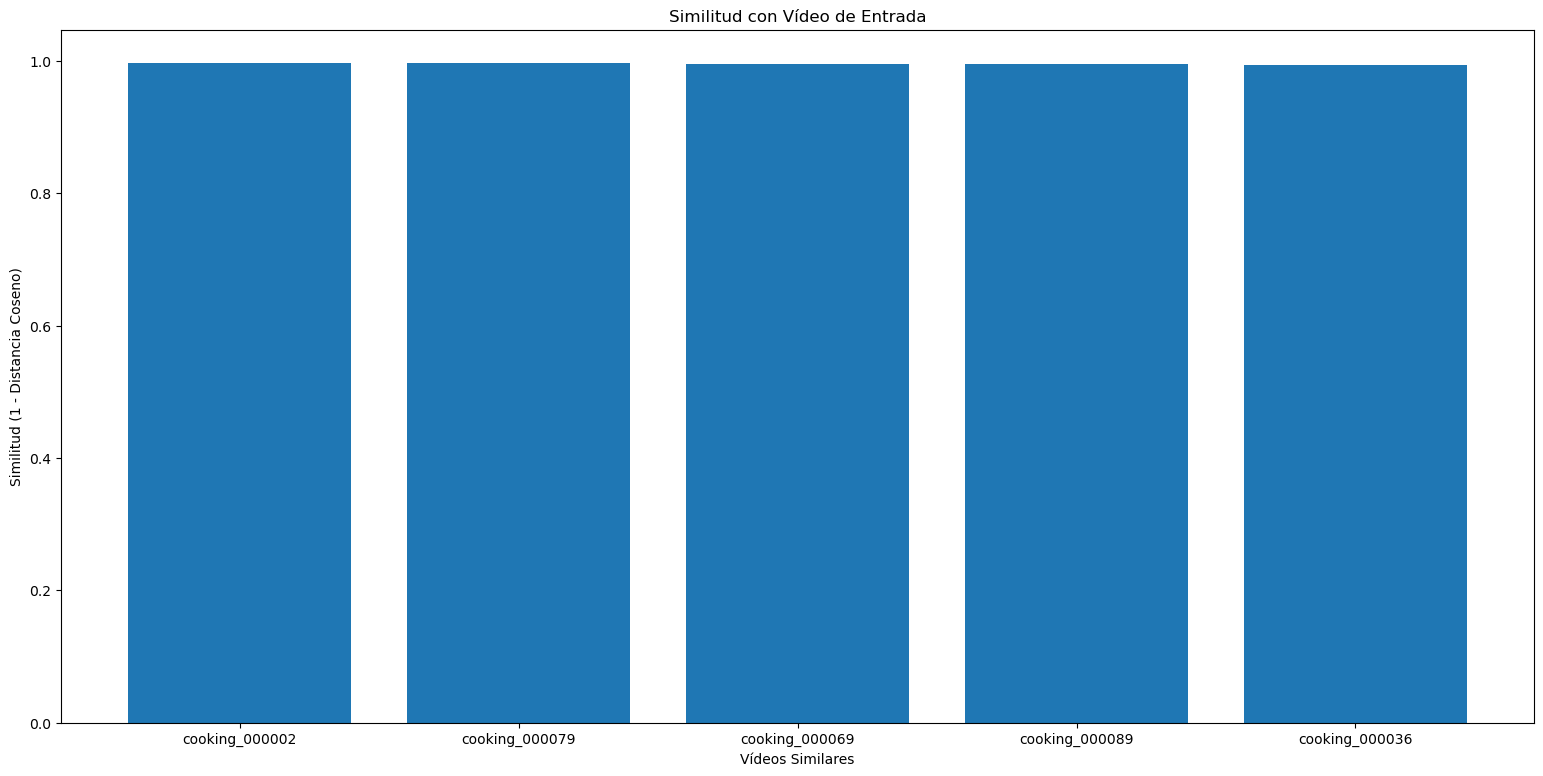

In [9]:
similar_videos = similares['video_name']
similarities = 1 - cosine_distances(X[np.where(video_names == ej_video)[0][0]].reshape(1, -1), X)[0]
similarities_sorted = np.sort(similarities)[::-1][1:6]

# Ploteamos
plt.figure(figsize=(19, 9))

plt.bar(similar_videos, similarities_sorted)
plt.title('Similitud con Vídeo de Entrada')
plt.xlabel('Vídeos Similares')
plt.ylabel('Similitud (1 - Distancia Coseno)')

plt.show()